# Sentiment Analysis of 2017&2018 Reviews

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

## 1. Analysis with reviews that have "Cool | Useful | Funny" labels

In [2]:
df_all = pd.read_csv('2017restaurants_with_all.csv')
df_all.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
5,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,1,2017-05-10,0,9CLEOpUCqRkIR02sx-JsMQ,5,littl hole wall realli delici mexican street f...,0,atyCaAjUYatIFDOGKy00SA
12,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,2,2017-05-01,1,ZULaTgcgMFJ4SHo_9ZcgxQ,5,fantast spot lunch great valu money attend mee...,2,ZS_qdLMh1XyXKGTrpKM-4Q


### 1.1 Feature engineering

#### 1.1.1 Define feature variables

In [3]:
documents_all = df_all['text']
documents_all.shape[0]

54614

#### 1.1.2 Define target variables

In [4]:
target_all = df_all['stars']
df_all['stars'].value_counts()

5    17042
4    16062
3     8934
1     7010
2     5566
Name: stars, dtype: int64

#### 1.1.3 Create training dataset and test dataset

In [5]:
from sklearn.model_selection import train_test_split
documents_all_train, documents_all_test, target_all_train, target_all_test = train_test_split(documents_all, target_all, random_state = 1, test_size=0.3)

In [7]:
documents_all_train.iloc[1]

'hidden gem middl nowher idea motiv drive minut downtown check birthday still ever glad set small strip mall famili run southern cook star worth drive wonder coupl run two decad still nail menu design impress satiat palat jambalaya star tempt wound split scallop handmad crab cake appet scallop cook perfect crab cake delight crispi exterior hot butteri crab fill incr order fisherman platter light cajun coat grouper stun perfect balanc textur spice flavour partner tenderloin serv well balanc light tarragon sauc simpli melt mouth young waitress friend knowledg effici back host demand stay complimentari birthday pecan pie creme carmel say awesom homemad dessert fussi review say folk nail around thank back tri rest menu experi warm hospit'

In [8]:
print(documents_all_train.shape,target_all_train.shape)

(38229,) (38229,)


#### 1.1.4 Get NLP representation of the documents_all

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer = 'word', stop_words = 'english', 
                             lowercase = True, max_features = 5000
                            )
documents_all_train_vec = vectorizer.fit_transform(documents_all_train.values.astype('U')).toarray()
words = vectorizer.get_feature_names()
documents_all_test_vec = vectorizer.transform(documents_all_test.values.astype('U')).toarray()

In [55]:
print(documents_all_train_vec.shape,documents_all_test_vec.shape)

(38229, 5000) (16385, 5000)


#### Define functions to get top and bottom labels

In [1]:
def get_top_values(ls, n, labels):
    return [labels[i] for i in np.argsort(ls)[::-1][:n]]  

def get_bottom_values(ls, n, labels):
    return [labels[i] for i in np.argsort(ls)[:n]]

### 1.2 Build model to predict rate based on reviews(cool | useful |funny)

#### 1.2.1 Naive-Bayes Classifier

In [11]:
from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB()
clf_NB.fit(documents_all_train_vec, target_all_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
print('The accuracy score of Naive-Bayes: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_NB.score(documents_all_train_vec, target_all_train), clf_NB.score(documents_all_test_vec, target_all_test)))

The accuracy score of Naive-Bayes: 

	Train data set:  0.582385, Test data set:  0.535490


#### 1.2.2 Logistic Regression Classifier

In [16]:
from sklearn.linear_model import LogisticRegression
clf_LR = LogisticRegression(multi_class = 'ovr', n_jobs = -1, verbose = 1)
clf_LR.fit(documents_all_train_vec, target_all_train)

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [17]:
print('The accuracy score of Logistic Regression: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_LR.score(documents_all_train_vec, target_all_train), clf_LR.score(documents_all_test_vec, target_all_test)))

The accuracy score of Logistic Regression: 

	Train data set:  0.665411, Test data set:  0.581019


In [20]:
n = 20
print ('Top 20 words by ranking are:\n\n %s.' % (", ".join(i for i in get_top_values(clf_LR.coef_[0], n, words))))

Top 20 words by ranking are:

 worst, horribl, terribl, disgust, poison, rude, zero, wast, disappoint, bad, poor, told, suck, avoid, custom, gross, sick, bare, dirti, tasteless.


##### The key words that make the negative prediction

In [21]:
print ('Top 20 words for negative prediction are:\n\n  %s.' % (", ".join(i for i in get_top_values(clf_LR.coef_[0], n, words))))

Top 20 words for negative prediction are:

  worst, horribl, terribl, disgust, poison, rude, zero, wast, disappoint, bad, poor, told, suck, avoid, custom, gross, sick, bare, dirti, tasteless.


##### The key words that make the positive prediction

In [22]:
print ('Top 20 words for positive prediction are:\n\n  %s.' % (", ".join(i for i in get_bottom_values(clf_LR.coef_[0], n, words))))

Top 20 words for positive prediction are:

  delici, good, great, amaz, best, perfect, love, nice, bit, tasti, excel, quick, pretti, definit, friend, quit, awesom, littl, fantast, enjoy.


#### 1.2.3 Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=100, max_depth = 25, min_samples_leaf= 5, 
                             min_samples_split=5, random_state = 1, n_jobs = -1, verbose = 1)
clf_RF.fit(documents_all_train_vec, target_all_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   47.5s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=1, warm_start=False)

In [25]:
print('The accuracy score of Random Forest: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_RF.score(documents_all_train_vec, target_all_train), clf_RF.score(documents_all_test_vec, target_all_test)))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s


The accuracy score of Random Forest: 

	Train data set:  0.634832, Test data set:  0.495758


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.4s finished


##### The important features (words) by inspecting the RFC model

In [26]:
n = 20
print ('Top 20 words by ranking are\n\n %s.' % (", ".join(i for i in get_top_values(clf_RF.feature_importances_, n, words))))

Top 20 words by ranking are

 amaz, delici, great, worst, love, best, rude, good, told, terribl, ask, decent, bit, perfect, pretti, bad, definit, horribl, order, bland.


#### 1.2.4 Comparison

The accuracy score of Naive-Bayes: Train data set:  0.582385, Test data set:  0.535490

The accuracy score of Logistic Regression: Train data set:  0.665411, Test data set:  0.581019

The accuracy score of Random Forest: Train data set:  0.634832, Test data set:  0.495758

- The Logistic Regression Classifier performs the best
- The RFC performs the worst

### 1.3 Use cross validation to evaluate these three classifiers

In [27]:
from sklearn.model_selection import cross_val_score
scores_NB = cross_val_score(clf_NB, documents_all_train_vec, target_all_train, cv=5)
print("Accuracy for Naive Bayes: %0.2f" % (scores_NB.mean()))
scores_LR = cross_val_score(clf_LR, documents_all_train_vec, target_all_train, cv=5)
print("Accuracy for Logistic Regression: %0.2f" % (scores_LR.mean()))
scores_RF = cross_val_score(clf_RF, documents_all_train_vec, target_all_train, cv=5)
print("Accuracy for Random Forest: %0.2f" % (scores_RF.mean()))

Accuracy for Naive Bayes: 0.53


/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]Accuracy for Logistic Regression: 0.58


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   33.4s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jo

Accuracy for Random Forest: 0.50


Accuracy for Naive Bayes: 0.53

Accuracy for Logistic Regression: 0.58

Accuracy for Random Forest: 0.50

### 1.4 Use grid search(即穷举法) to find the best parameters of Logistics Regression Classifier

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
gs_clf = LogisticRegression(multi_class = 'ovr', n_jobs = -1, verbose = 1)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.05, 0.1, 0.5, 1.0],
    'random_state': [1]
}
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(gs_clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(documents_all_train_vec, target_all_train)
clf_best = grid_obj.best_estimator_

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

In [29]:
print('The best accuracy score:\n\n \t Train data set:  %f, Test data set: %f' % \
     (clf_best.score(documents_all_train_vec, target_all_train), clf_best.score(documents_all_test_vec, target_all_test)))

The best accuracy score:

 	 Train data set:  0.641346, Test data set: 0.585108


### 1.5 Create a Confusion Matrix visualization

In [31]:
from sklearn.metrics import confusion_matrix
cm_all = confusion_matrix(y_pred = clf_best.predict(documents_all_test_vec), y_true = target_all_test)

Text(0.5,0,'Predicted label')

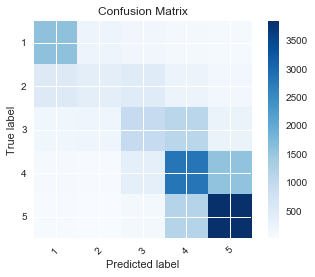

In [71]:
classes = ['1', '2', '3', '4', '5']
plt.imshow(cm_all, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

3和4，4和5的混淆比较严重

## 2. Analysis with reviews that have "Useful" label

In [48]:
df_useful = pd.read_csv('2017restaurants_with_useful.csv')
df_useful.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
12,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,2,2017-05-01,1,ZULaTgcgMFJ4SHo_9ZcgxQ,5,fantast spot lunch great valu money attend mee...,2,ZS_qdLMh1XyXKGTrpKM-4Q
65,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,"Restaurants, Breakfast & Brunch",3.5,0,2017-06-27,0,SOc_A-Pp55gSnq0zuujXsw,5,food good extrem die move canada restaur good ...,1,xeqaoYVmtmasGQX9c5jwGQ


### 2.1 Feature engineering

#### 2.1.1 Define feature variables

In [49]:
documents_useful = df_useful['text']
documents_useful.shape[0]

46800

#### 2.1.2 Define target variables

In [50]:
target_useful = df_useful['stars']
df_useful['stars'].value_counts()

5    14469
4    13768
3     7726
1     5993
2     4844
Name: stars, dtype: int64

#### 2.1.3 Create training dataset and test dataset

In [51]:
documents_useful_train, documents_useful_test, target_useful_train, target_useful_test = \
    train_test_split(documents_useful, target_useful, random_state = 1, test_size=0.3)

In [52]:
print(documents_useful_train.shape,target_useful_train.shape)

(32760,) (32760,)


#### 2.1.4 Get NLP representation of the documents_useful

In [53]:
vectorizer_useful = TfidfVectorizer(analyzer = 'word', stop_words = 'english', 
                             lowercase = True, max_features = 5000
                            )
documents_useful_train_vec = vectorizer_useful.fit_transform(documents_useful_train.values.astype('U')).toarray()
words_useful = vectorizer_useful.get_feature_names()
documents_useful_test_vec = vectorizer_useful.transform(documents_useful_test.values.astype('U')).toarray()

In [54]:
print(documents_useful_train_vec.shape,documents_useful_test_vec.shape)

(32760, 5000) (14040, 5000)


### 2.2 Build model to predict rate based on reviews (useful)

##### 2.2.1 Naive-Bayes Classifier

In [56]:
clf_NB_useful = MultinomialNB()
clf_NB_useful.fit(documents_useful_train_vec, target_useful_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [57]:
print('The accuracy score of Naive-Bayes: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_NB_useful.score(documents_useful_train_vec, target_useful_train), \
      clf_NB_useful.score(documents_useful_test_vec, target_useful_test)))

The accuracy score of Naive-Bayes: 

	Train data set:  0.587027, Test data set:  0.531125


##### 2.2.2 Logistic Regression Classifier

In [58]:
clf_LR_useful = LogisticRegression(multi_class = 'ovr', n_jobs = -1, verbose = 1)
clf_LR_useful.fit(documents_useful_train_vec, target_useful_train)

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [59]:
print('The accuracy score of Logistic Regression: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_LR_useful.score(documents_useful_train_vec, target_useful_train), clf_LR_useful.score(documents_useful_test_vec, target_useful_test)))

The accuracy score of Logistic Regression: 

	Train data set:  0.674725, Test data set:  0.571510


In [60]:
n = 20
print ('Top 20 words by ranking are:\n\n %s.' % (", ".join(i for i in get_top_values(clf_LR_useful.coef_[0], n, words_useful))))

Top 20 words by ranking are:

 worst, terribl, horribl, disgust, rude, poison, bad, disappoint, wast, told, zero, avoid, poor, gross, wor, tasteless, sick, money, manag, custom.


###### The key words that make the negative prediction

In [61]:
print ('Top 20 words for negative prediction are:\n\n  %s.' % (", ".join(i for i in get_top_values(clf_LR_useful.coef_[0], n, words_useful))))

Top 20 words for negative prediction are:

  worst, terribl, horribl, disgust, rude, poison, bad, disappoint, wast, told, zero, avoid, poor, gross, wor, tasteless, sick, money, manag, custom.


###### The key words that make the positive prediction

In [62]:
print ('Top 20 words for positive prediction are:\n\n  %s.' % (", ".join(i for i in get_bottom_values(clf_LR_useful.coef_[0], n, words_useful))))

Top 20 words for positive prediction are:

  delici, great, good, amaz, best, perfect, love, nice, excel, bit, quick, tasti, quit, friend, definit, pretti, awesom, enjoy, littl, fantast.


##### 2.2.3 Random Forest Classifier

In [63]:
clf_RF_useful = RandomForestClassifier(n_estimators=100, max_depth = 25, min_samples_leaf= 5, 
                             min_samples_split=5, random_state = 1, n_jobs = -1, verbose = 1)
clf_RF_useful.fit(documents_useful_train_vec, target_useful_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   39.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=1, warm_start=False)

In [64]:
print('The accuracy score of Random Forest: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_RF_useful.score(documents_useful_train_vec, target_useful_train), clf_RF_useful.score(documents_useful_test_vec, target_useful_test)))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished


The accuracy score of Random Forest: 

	Train data set:  0.650672, Test data set:  0.492236


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


##### 2.2.4 Comparison

The accuracy score of Naive-Bayes: Train data set:  0.587027, Test data set:  0.531125

The accuracy score of Logistic Regression: Train data set:  0.674725, Test data set:  0.571510

The accuracy score of Random Forest: Train data set:  0.650672, Test data set:  0.492236

- The Logistic Regression Classifier performs the best
- The Random Forest Classifier performs the worst 

**Compare with using dataset contains cool|useful|funny labels: **
    - The accuracy scores for train data-sets are higher,
    - The accuracy scores for test data-sets are lower 

### 2.3 Use cross validation to evaluate these three classifiers

In [89]:
scores_NB_useful = cross_val_score(clf_NB_useful, documents_useful_train_vec, target_useful_train, cv=5)
print("Accuracy for Naive Bayes: %0.2f" % (scores_NB_useful.mean()))
scores_LR_useful = cross_val_score(clf_LR_useful, documents_useful_train_vec, target_useful_train, cv=5)
print("Accuracy for Logistic Regression: %0.2f" % (scores_LR_useful.mean()))
scores_RF_useful = cross_val_score(clf_RF_useful, documents_useful_train_vec, target_useful_train, cv=5)
print("Accuracy for Random Forest: %0.2f" % (scores_RF_useful.mean()))

Accuracy for Naive Bayes: 0.53


/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]Accuracy for Logistic Regression: 0.58


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.5s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.6s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   25.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jo

Accuracy for Random Forest: 0.49


Accuracy for Naive Bayes: 0.53

Accuracy for Logistic Regression: 0.58

Accuracy for Random Forest: 0.49

### 2.4 Grid search

In [90]:
gs_clf_useful = LogisticRegression(multi_class = 'ovr', n_jobs = -1, verbose = 1)
acc_scorer = make_scorer(accuracy_score)
grid_obj_useful = GridSearchCV(gs_clf_useful, param_grid, cv=5, scoring=acc_scorer)
grid_obj_useful = grid_obj_useful.fit(documents_useful_train_vec, target_useful_train)
clf_best_useful = grid_obj_useful.best_estimator_

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

In [91]:
print('The best accuracy score:\n\n \t Train data set:  %f, Test data set: %f' % \
     (clf_best_useful.score(documents_useful_train_vec, target_useful_train), \
      clf_best_useful.score(documents_useful_test_vec, target_useful_test)))

The best accuracy score:

 	 Train data set:  0.644902, Test data set: 0.576923


### 2.5 Create a Confusion Matrix visualization

In [69]:
cm_useful = confusion_matrix(y_pred = clf_best_useful.predict(documents_useful_test_vec), \
                             y_true = target_useful_test)

Text(0.5,0,'Predicted label')

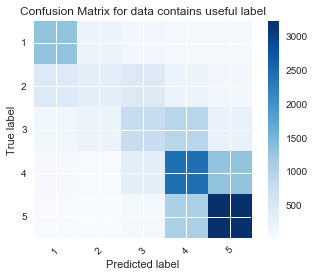

In [70]:
classes = ['1', '2', '3', '4', '5']
plt.imshow(cm_useful, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for data contains useful label")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

3和4，4和5的混淆仍然比较严重

## 3. Analysis with reviews that have "Funny" label

In [72]:
df_funny = pd.read_csv('2017restaurants_with_funny.csv')
df_funny.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
12,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,2,2017-05-01,1,ZULaTgcgMFJ4SHo_9ZcgxQ,5,fantast spot lunch great valu money attend mee...,2,ZS_qdLMh1XyXKGTrpKM-4Q
123,-0DET7VdEQOJVJ_v6klEug,Flaming Kitchen,"Asian Fusion, Restaurants",3.0,3,2017-05-02,2,uidpok2Th_Nxzd9_LMCrxQ,4,use aka teppan tabl chair cutleri cup hot plat...,11,ZXae3RfkH1LnKX0UjXNj3Q


### 3.1 Feature engineering

#### 3.1.1 Define feature variables

In [73]:
documents_funny = df_funny['text']
documents_funny.shape[0]

17759

#### 3.1.2 Define target variables

In [74]:
target_funny = df_funny['stars']
df_funny['stars'].value_counts()

4    5139
5    5019
3    2902
1    2690
2    2009
Name: stars, dtype: int64

#### 3.1.3 Create training dataset and test dataset

In [75]:
documents_funny_train, documents_funny_test, target_funny_train, target_funny_test = \
    train_test_split(documents_funny,target_funny,random_state=1,test_size=0.3)

In [77]:
print(documents_funny_train.shape, target_useful_train.shape, '\n', \
      documents_funny_test.shape, target_funny_test.shape)

(12431,) (32760,) 
 (5328,) (5328,)


#### 3.1.4 Get NLP representation of the documents_funny

In [78]:
vectorizer_funny = TfidfVectorizer(analyzer = 'word', stop_words = 'english', 
                             lowercase = True, max_features = 5000
                            )
documents_funny_train_vec = vectorizer_funny.fit_transform(documents_funny_train.values.astype('U')).toarray()
words_funny = vectorizer_funny.get_feature_names()
documents_funny_test_vec = vectorizer_funny.transform(documents_funny_test.values.astype('U')).toarray()

In [79]:
print(documents_funny_train_vec.shape,documents_funny_test_vec.shape)

(12431, 5000) (5328, 5000)


### 3.2 Build model to predict rate based on reviews (funny)

#### 3.2.1 Naive-Bayes Classifier

In [80]:
clf_NB_funny = MultinomialNB()
clf_NB_funny.fit(documents_funny_train_vec, target_funny_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [81]:
print('The accuracy score of Naive-Bayes: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_NB_funny.score(documents_funny_train_vec, target_funny_train), \
      clf_NB_funny.score(documents_funny_test_vec, target_funny_test)))

The accuracy score of Naive-Bayes: 

	Train data set:  0.603974, Test data set:  0.493994


#### 3.2.2 Logistic Regression Classifier

In [82]:
clf_LR_funny = LogisticRegression(multi_class = 'ovr', n_jobs = -1, verbose = 1)
clf_LR_funny.fit(documents_funny_train_vec, target_funny_train)

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [83]:
print('The accuracy score of Logistic Regression: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_LR_funny.score(documents_funny_train_vec, target_funny_train), \
      clf_LR_funny.score(documents_funny_test_vec, target_funny_test)))

The accuracy score of Logistic Regression: 

	Train data set:  0.707586, Test data set:  0.547860


#### 3.2.3 Random Forest Classifier

In [84]:
clf_RF_funny = RandomForestClassifier(n_estimators=100, max_depth = 25, min_samples_leaf= 5, 
                             min_samples_split=5, random_state = 1, n_jobs = -1, verbose = 1)
clf_RF_funny.fit(documents_funny_train_vec, target_funny_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.7s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=1, warm_start=False)

In [85]:
print('The accuracy score of Random Forest: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_RF_funny.score(documents_funny_train_vec, target_funny_train), \
      clf_RF_funny.score(documents_funny_test_vec, target_funny_test)))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


The accuracy score of Random Forest: 

	Train data set:  0.689486, Test data set:  0.476539


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


#### 3.2.4 Comparison

The accuracy score of Naive-Bayes: Train data set:  0.603974, Test data set:  0.493994

The accuracy score of Logistic Regression: Train data set:  0.707586, Test data set:  0.547860

The accuracy score of Random Forest: Train data set:  0.689486, Test data set:  0.476539

- The Logistic Regression Classifier performs the best
- The Random Forest Classifier performs the worst 

**Compare with using dataset contains useful label: **
    - The accuracy scores for train data-sets are higher,
    - The accuracy scores for test data-sets are lower.

### 3.3 Use cross validation to evaluate these three classifiers

In [86]:
scores_NB_funny = cross_val_score(clf_NB_funny, documents_funny_train_vec, target_funny_train, cv=5)
print("Accuracy for Naive Bayes: %0.2f" % (scores_NB_funny.mean()))
scores_LR_funny = cross_val_score(clf_LR_funny, documents_funny_train_vec, target_funny_train, cv=5)
print("Accuracy for Logistic Regression: %0.2f" % (scores_LR_funny.mean()))
scores_RF_funny = cross_val_score(clf_RF_funny, documents_funny_train_vec, target_funny_train, cv=5)
print("Accuracy for Random Forest: %0.2f" % (scores_RF_funny.mean()))

Accuracy for Naive Bayes: 0.50


/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]Accuracy for Logistic Regression: 0.55


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.3s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jo

Accuracy for Random Forest: 0.48


Accuracy for Naive Bayes: 0.50

Accuracy for Logistic Regression: 0.55

Accuracy for Random Forest: 0.48

### 3.4 Grid Research

In [87]:
gs_clf_funny = LogisticRegression(multi_class = 'ovr', n_jobs = -1, verbose = 1)
acc_scorer = make_scorer(accuracy_score)
grid_obj_funny = GridSearchCV(gs_clf_funny, param_grid, cv=5, scoring=acc_scorer)
grid_obj_funny = grid_obj_funny.fit(documents_funny_train_vec, target_funny_train)
clf_best_funny = grid_obj_funny.best_estimator_

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

In [88]:
print('The best accuracy score:\n\n \t Train data set:  %f, Test data set: %f' % \
     (clf_best_funny.score(documents_funny_train_vec, target_funny_train), \
      clf_best_funny.score(documents_funny_test_vec, target_funny_test)))

The best accuracy score:

 	 Train data set:  0.707586, Test data set: 0.547860


### 3.5 Create a Confusion Matrix visualization

In [92]:
cm_funny = confusion_matrix(y_pred = clf_best_funny.predict(documents_funny_test_vec), \
                             y_true = target_funny_test)

Text(0.5,0,'Predicted label')

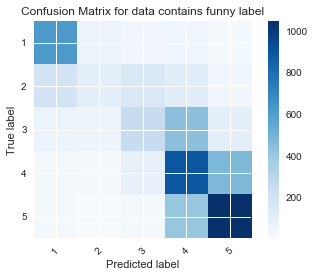

In [93]:
classes = ['1', '2', '3', '4', '5']
plt.imshow(cm_funny, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for data contains funny label")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## 4. Analysis with reviews that have "Cool" label

In [95]:
df_cool = pd.read_csv('2017restaurants_with_cool.csv')
df_cool.head(2)

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id
12,--1UhMGODdWsrMastO9DZw,The Spicy Amigos,"Restaurants, Mexican",4.0,2,2017-05-01,1,ZULaTgcgMFJ4SHo_9ZcgxQ,5,fantast spot lunch great valu money attend mee...,2,ZS_qdLMh1XyXKGTrpKM-4Q
65,--DaPTJW3-tB1vP-PfdTEg,Sunnyside Grill,"Restaurants, Breakfast & Brunch",3.5,0,2017-06-27,0,SOc_A-Pp55gSnq0zuujXsw,5,food good extrem die move canada restaur good ...,1,xeqaoYVmtmasGQX9c5jwGQ


### 4.1 Feature Engineering

#### 4.1.1 Define feature variables

In [96]:
documents_cool = df_cool['text']
documents_cool.shape[0]

46800

#### 4.1.2 Define target variables

In [99]:
target_cool = df_cool['stars']
df_cool['stars'].value_counts()

5    14469
4    13768
3     7726
1     5993
2     4844
Name: stars, dtype: int64

#### 4.1.3 Create training dataset and test dataset

In [100]:
documents_cool_train, documents_cool_test, target_cool_train, target_cool_test = \
    train_test_split(documents_cool,target_cool,random_state=1,test_size=0.3)

In [101]:
print(documents_cool_train.shape, target_cool_train.shape, '\n', \
      documents_cool_test.shape, target_cool_test.shape)

(32760,) (32760,) 
 (14040,) (14040,)


#### 4.1.4 Get NLP representation of the documents_funny

In [102]:
vectorizer_cool = TfidfVectorizer(analyzer = 'word', stop_words = 'english', 
                             lowercase = True, max_features = 5000
                            )
documents_cool_train_vec = vectorizer_cool.fit_transform(documents_cool_train.values.astype('U')).toarray()
words_cool = vectorizer_cool.get_feature_names()
documents_cool_test_vec = vectorizer_cool.transform(documents_cool_test.values.astype('U')).toarray()

In [103]:
print(documents_cool_train_vec.shape,documents_cool_test_vec.shape)

(32760, 5000) (14040, 5000)


### 4.2 Build model to predict rate based on reviews (cool)

#### 4.2.1 Naive-Bayes Classifier

In [104]:
clf_NB_cool = MultinomialNB()
clf_NB_cool.fit(documents_cool_train_vec, target_cool_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [105]:
print('The accuracy score of Naive-Bayes: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_NB_cool.score(documents_cool_train_vec, target_cool_train), \
      clf_NB_cool.score(documents_cool_test_vec, target_cool_test)))

The accuracy score of Naive-Bayes: 

	Train data set:  0.587027, Test data set:  0.531125


#### 4.2.2 Logistic Regression Classifier

In [106]:
clf_LR_cool = LogisticRegression(multi_class = 'ovr', n_jobs = -1, verbose = 1)
clf_LR_cool.fit(documents_cool_train_vec, target_cool_train)

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=1, warm_start=False)

In [108]:
print('The accuracy score of Logistic Regression: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_LR_cool.score(documents_cool_train_vec, target_cool_train), \
      clf_LR_cool.score(documents_cool_test_vec, target_cool_test)))

The accuracy score of Logistic Regression: 

	Train data set:  0.674725, Test data set:  0.571510


#### 4.2.3 Random Forest Classifier

In [109]:
clf_RF_cool = RandomForestClassifier(n_estimators=100, max_depth = 25, min_samples_leaf= 5, 
                             min_samples_split=5, random_state = 1, n_jobs = -1, verbose = 1)
clf_RF_cool.fit(documents_cool_train_vec, target_cool_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   36.9s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=1, warm_start=False)

In [110]:
print('The accuracy score of Random Forest: \n\n\tTrain data set:  %f, Test data set:  %f' % \
     (clf_RF_cool.score(documents_cool_train_vec, target_cool_train), \
      clf_RF_cool.score(documents_cool_test_vec, target_cool_test)))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


The accuracy score of Random Forest: 

	Train data set:  0.650672, Test data set:  0.492236


#### 4.2.4 Comparison

The accuracy score of Naive-Bayes: Train data set:  0.587027, Test data set:  0.531125

The accuracy score of Logistic Regression: Train data set:  0.674725, Test data set:  0.571510

The accuracy score of Random Forest: Train data set:  0.650672, Test data set:  0.492236

- The Logistic Regression Classifier performs the best
- The Random Forest Classifier performs the worst 

**Compare with using dataset contains useful/funny label: **
    - The accuracy scores for train data-sets are higher than useful,
    - The accuracy scores for test data-sets are lower than useful.
    - the same as useful,means all the rows that have useful label also have cool label

### 4.3 Use cross validation to evaluate these three classifiers

In [111]:
scores_NB_cool = cross_val_score(clf_NB_cool, documents_cool_train_vec, target_cool_train, cv=5)
print("Accuracy for Naive Bayes: %0.2f" % (scores_NB_cool.mean()))
scores_LR_cool = cross_val_score(clf_LR_cool, documents_cool_train_vec, target_cool_train, cv=5)
print("Accuracy for Logistic Regression: %0.2f" % (scores_LR_cool.mean()))
scores_RF_cool = cross_val_score(clf_RF_cool, documents_cool_train_vec, target_cool_train, cv=5)
print("Accuracy for Random Forest: %0.2f" % (scores_RF_cool.mean()))

Accuracy for Naive Bayes: 0.53


/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]Accuracy for Logistic Regression: 0.58


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   30.9s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.7s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.8s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jo

Accuracy for Random Forest: 0.49


Accuracy for Naive Bayes: 0.53

Accuracy for Logistic Regression: 0.58

Accuracy for Random Forest: 0.49

### 4.4 Grid Research

In [112]:
gs_clf_cool = LogisticRegression(multi_class = 'ovr', n_jobs = -1, verbose = 1)
acc_scorer = make_scorer(accuracy_score)
grid_obj_cool = GridSearchCV(gs_clf_cool, param_grid, cv=5, scoring=acc_scorer)
grid_obj_cool = grid_obj_cool.fit(documents_cool_train_vec, target_cool_train)
clf_best_cool = grid_obj_cool.best_estimator_

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

/Users/suhang/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


[LibLinear]

In [114]:
print('The best accuracy score:\n\n \t Train data set:  %f, Test data set: %f' % \
     (clf_best_cool.score(documents_cool_train_vec, target_cool_train), \
      clf_best_cool.score(documents_cool_test_vec, target_cool_test)))

The best accuracy score:

 	 Train data set:  0.644902, Test data set: 0.576923


### 4.5 Create a Confusion Matrix visualization

In [115]:
cm_cool = confusion_matrix(y_pred = clf_best_cool.predict(documents_cool_test_vec), \
                             y_true = target_cool_test)

Text(0.5,0,'Predicted label')

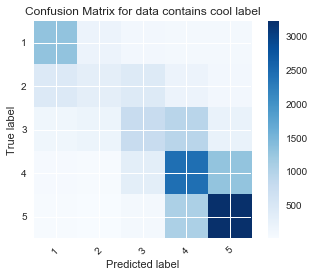

In [116]:
classes = ['1', '2', '3', '4', '5']
plt.imshow(cm_cool, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for data contains cool label")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## 5. Conclusion

Accuracy score: useful+funny+cool > cool > useful >funny

It seems that no matter using sub-data-set contains useful, funny or cool label, we can not get better training result. 

It is hard to classify these data into 5 categories with any of the dataset used in this step